(-2168070.5583405863, 612198.4700071239, -2359970.873026961, 4315585.634593019)
hCoV-19/South Korea/KDCA4422/2021 does not have location


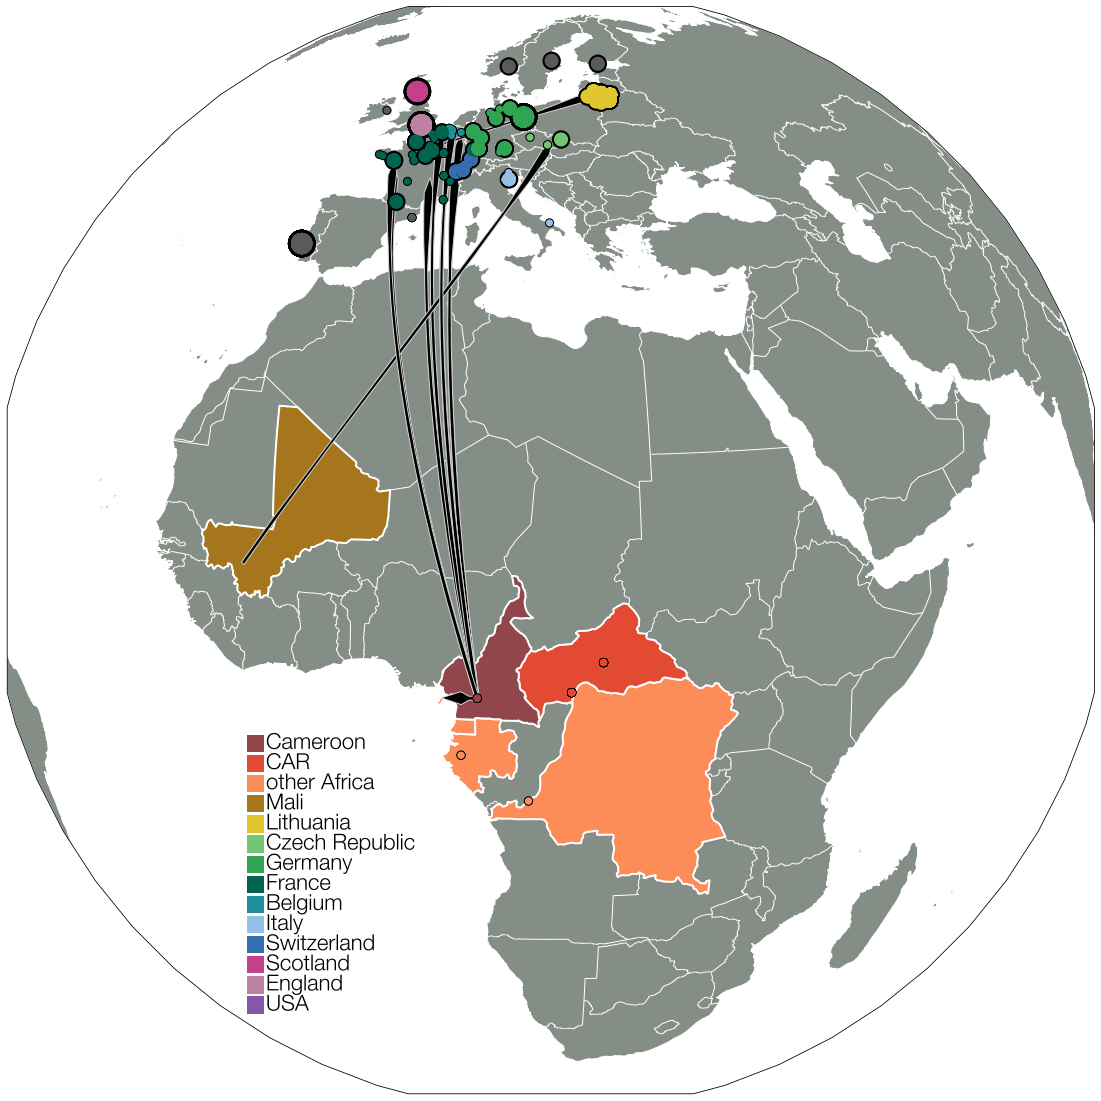

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.collections import LineCollection
from matplotlib.patches import Rectangle,Polygon
from matplotlib.gridspec import GridSpec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

import os,glob
import numpy as np
# from Bio import SeqIO
# from collections import Counter

# import baltic as bt

import cartopy
import cartopy.crs as ccrs


def desaturate(rgb,sat,lum=None):
    if isinstance(rgb,str):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given
    elif np.array(rgb).shape[-1]==4: ## if there's four values
        rgb=rgb[:-1]
    elif isinstance(rgb,unicode):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given

    assert 0.0<=sat<=1.0,'Desaturation outside allowed interval'
    assert np.array(rgb).shape[-1]==3,'Incorrect colour array shape'
    hsv=mpl.colors.rgb_to_hsv(rgb) ## convert rgb vector to hue, saturation, value
    hsv[1]=sat ## use provided saturation
    if lum:
        hsv[2]=lum ## use provided luminosity
    
    return mpl.colors.hsv_to_rgb(hsv) ## convert back to rgb


fig = plt.subplots(figsize=(20,20),facecolor='w')

class RP(ccrs.NearsidePerspective):
    @property
    def threshold(self):
        return 1e3

# proj=ccrs.Geostationary(central_longitude=17,satellite_height=14000000)
# proj=ccrs.Geostationary(central_longitude=17,satellite_height=14000000)
proj=ccrs.NearsidePerspective(central_longitude=17, central_latitude=15, satellite_height=14000000, false_easting=0, false_northing=0, globe=None)

gs = GridSpec(1,1,hspace=0.01,wspace=0.0)
# ax=plt.subplot(gs[0],projection=proj)
ax=plt.subplot(gs[0],projection=RP(central_longitude=17, central_latitude=15, satellite_height=14000000))


colours={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/colours.csv','r'):
    loc,colour=line.strip('\n').split('\t')
    colours[loc]=colour
colours['Democratic Republic of the Congo']=colours['DRC']
colours['Central African Republic']=colours['CAR']

loc_size={'town': 1, 'county': 2, 'country': 3}
coordinates={'Liège': (50.63373,5.56749,'town'), 
             'England': (51.509865,-0.118092,'country'), 
             'Rhineland-Palatinate': (49.992863,8.247253,'county'), 
             'Geneva': (46.204391,6.143158,'county'), 
             'Sint-Joost-ten-Node': (50.85,4.383333,'town'), 
             'Vilniaus_apskritis': (54.68916,25.2798,'county'), 
             'Lower_Saxony': (52.373920,9.735603,'county'), 
             'Bavaria': (48.777500,11.431111,'county'), 
             'La_Roche-sur-Yon': (46.670502,-1.426000,'town'), 
             'Issoire': (45.55,3.25,'town'), 
             'Alytus': (54.4000,24.0500,'county'), 
             'Alytaus_apskritis': (54.4000,24.0500,'county'), 
             'Maryland': (39.045753,-76.641273,'country'), 
             'Pontoise': (49.051601,2.101700,'town'), 
             'Taurages': (55.25222, 22.28972,'county'), 
             'Taurages_apskritis': (55.25222, 22.28972,'county'), 
             'Utenos': (55.5,25.6,'county'), 
             'Kaunas': (54.90272,23.90961,'county'), 
             'Kauno': (54.90272,23.90961,'county'), 
             'Kauno_apskritis': (54.90272,23.90961,'county'), 
             'Marijampole': (54.56667, 23.35,'county'), 
             'Marijampoles': (54.56667, 23.35,'county'), 
             'Utenos_apskritis': (55.5,25.6,'county'), 
             'Siauliu_apskritis': (55.934908,23.313682,'county'), 
             'Siauliu': (55.934908,23.313682,'county'), 
             'Panevezio': (55.7333,24.3500,'county'), 
             'Panevezio_apskritis': (55.7333,24.3500,'county'), 
             'Vilassar_De_Mar': (41.50408,2.39226,'town'), 
             'Utena': (55.5,25.6,'county'), 
             'Germany': (52.531677,13.381777,'country'), 
             'Vilnius': (54.68916,25.2798,'county'), 
             'Vilniaus': (54.68916,25.2798,'county'), 
             'Asse': (50.91011,4.19836,'town'), 
             'West_Virginia': (32.784618,-79.940918,'country'), 
             'Cluses': (46.060390,6.580582,'town'), 
             'CLUSES': (46.060390,6.580582,'town'), 
             'CAR': (6.6194,20.9367,'country'), 
             'Hauts-de-France': (50.629250,3.057256,'county'), 
#              'Equatorial Guinea': (1.6195,10.3178,'country'), 
             'Central African Republic Park': (3.436900,16.346400,'town'), ## park coordinates
             'Central_African_Republic': (4.36122,18.55496,'town'), ## Bangui
             'Olomouc_Region': (49.593778,17.250879,'county'), 
             'Le_Havre': (49.490002,0.100000,'town'), 
             'Lochristi': (51.097461,3.837824,'town'), 
             'Buggenhout': (51.0159,4.20173,'town'), 
             'Mali': (12.635898,-7.971547,'country'), 
             'Cameroon': (3.844119, 11.501346,'country'), 
             'Equatorial_Guinea': (3.75578,8.78166,'country'),
             'Neder-Over-Heembeek': (50.9057, 4.3922,'town'), 
             'France': (48.864716,2.349014,'country'), 
             'Vilassar De Dalt': (41.517, 2.367,'town'), 
             'Dublin': (53.350140,-6.266155,'town'), 
             'Ile-de-France': (48.5000,2.5000,'county'), 
             'Basel-Landschaft': (47.559601,7.588576,'county'), 
             'Marseille': (43.296398,5.370000,'town'), 
             'Brno': (49.19522,16.60796, 'town'), 
             'Portugal': (38.736946,-9.142685,'country'), 
             'Orleans': (47.90289,1.90389,'town'), 
             'Vaud': (46.478176,6.238849,'town'), 
             'Merelbeke': (50.994550,3.745640,'town'), 
             'Bremen': (53.07516,8.80777,'town'), 
             'Nantes': (47.218102,-1.552800,'town'), 
             'Mecklenburg-Western_Pomerania': (53.629593,11.414763,'county'), 
             'Walcourt': (50.2540,4.4380,'town'), 
             'Bangui': (4.36122,18.55496,'town'), 
             'Prague': (50.073658,14.418540,'town'), 
             'Minnesota': (46.392410,-94.636230,'country'), 
             'Bern': (46.947456,7.451123,'town'), 
             'Yaounde': (3.844119,11.501346,'town'), 
             'Troyes': (48.299702,4.079200,'town'), 
             'Viken': (59.751,10.025,'county'), 
             'Kinshasa': (-4.322447,15.307045,'town'), 
             'Puteaux': (48.884998,2.238900,'town'), 
             'Texas': (29.749907,-95.358421,'country'), 
             'Michigan': (44.182205,-84.506836,'country'), 
             'Quimperle': (47.86667, -3.55,'town'), 
             'Chateaulin': (48.195,4.091,'town'), 
             'Quimper': (47.996700,-4.096400,'town'), 
             'Chambrey_Les_Tours': (47.3354,0.7029,'town'), 
             'Niel': (51.11096,4.33428,'town'), 
             'Liege': (50.632557,5.579666, 'town'), 
             'Augsburg': (48.366512,10.894446,'town'), 
             'Vorst': (51.083,5.067,'town'), 
             'Accra': (5.614818,-0.205874,'town'), 
             'Scotland': (55.953251,-3.188267,'country'), 
             'Alberta': (55.000000,-115.000000,'country'), 
             'South_Korea': (37.532600,127.024612,'country'), 
             'Bayanga': (6.611111,20.939444,'town'), 
             'Washington': (47.751076,-120.740135,'country'), 
             'Normandie': (49.490002,0.100000,'county'), 
             'Valais': (46.383013,6.860901,'county'), 
             'Brussels': (50.85045,4.34878,'town'), 
             'Brussels_Capital_Region': (50.85045,4.34878,'town'), 
             'Hautes-Pyrenees': (43.0193924,0.1494988,'county'), 
             'Loire_Atlantique': (47.34816145,-1.87274612146193,'county'), 
             'Baden-Wurttemberg': (48.758339,8.243008,'county'), 
             'North_Rhine-Westphalia': (50.733334,7.100000,'county'), 
             'Notre-Dame-de-Sanilhac': (45.121311,0.713850,'town'), 
             'Ghent': (51.049999,3.733333,'town'), 
             'Paris': (48.864716,2.349014,'town'), 
             'Indiana': (40.273502,-86.126976,'country'), 
             'Hong_Kong': (22.302711,114.177216,'town'), 
             'Amiens': (49.894066,2.295753,'town'), 
             'Grand-Est': (48.580002,7.750000,'county'), 
             'Tours': (47.394144,0.684840,'town'), 
             'Central_Visayas': (10.3095549,123.8931107,'county'), 
             'Padova': (45.406435,11.876761,'town'), 
             'Belluno': (46.142463,12.216709,'town'), 
             'Lambarene': (-0.7001, 10.24055,'town'), 
             'Gavleborg': (60.674880,17.141273,'county'), 
             'Grenoble': (45.171547,5.722387,'town'), 
             'Cergy_Pontoise': (49.03894, 2.07805,'town'), 
             'Lyon': (45.763420, 4.834277,'town'), 
             'Apulia': (41.125278,16.866667,'town'), 
             'New_Jersey': (39.833851,-74.871826,'country'), 
             'Neuchatel': (46.989987,6.929273,'town'), 
             'Veneto': (45.438759,12.327145,'county'), 
             'Centre-Val_de_Loire': (47.902500, 1.909000,'county'), 
             'Basel-Stadt': (47.559601,7.588576,'town'), 
             'Hamburg': (53.551086,9.993682,'town'), 
             'Illinois': (39.799999,-89.650002,'country'), 
             'Ecuires': (50.4439,1.76528,'town'), 
             'Uusimaa': (60.192059,24.945831,'county'), 
             'Le_Mans': (48.008224,0.209856,'town'), 
             'Moravian-Silesian_Region': (49.820923,18.262524,'county')}

travel={}
locs={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/travel_qc_info.csv','r'):
    l=line.strip('\n').split('\t')
#     print(l[3])
    if l[0]!='Virus name':
        locs[l[0].replace(' ','_')]=[c.strip(' ').replace(' ','_') for c in l[3].split('/')][-1]
        if l[4]!='':
            travel[l[0]]=l[4]

locs['hCoV-19/Belgium/ULG-12917/2021']='Liege'
locs['hCoV-19/Belgium/rega-5050/2021']='Brussels'

locs['hCoV-19/Belgium/Aalst-OLVZ-8042639/2021']='Asse'
locs['hCoV-19/Belgium/UGent-4359/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-4369/2021']='Buggenhout'

locs['hCoV-19/Belgium/UGent-4966/2021']='Merelbeke'
locs['hCoV-19/Belgium/UGent-5440/2021']='Merelbeke'

locs['hCoV-19/Belgium/IPG-282/2021']='Walcourt'

locs['hCoV-19/Belgium/UZA-UA-21050048/2021']='Niel'
locs['hCoV-19/Belgium/UGent-5664/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-5688/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-5690/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-5708/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-5861/2021']='Lochristi'

locs['hCoV-19/Belgium/UGent-5728/2021']='Merelbeke'

locs['hCoV-19/Belgium/rega-6642/2021']='Brussels'
locs['hCoV-19/Belgium/MBLGPF541707/2021']='Brussels'
locs['hCoV-19/Belgium/ULG-16426/2021']='Brussels'

locs['hCoV-19/Belgium/ULG-16502/2021']='Liege'
locs['hCoV-19/Belgium/rega-9607/2021']='Brussels'
locs['hCoV-19/Belgium/rega-8902/2021']='Brussels'


# s=loc_size[size]**2
# if (lon,lat) not in done:
#     ax2.scatter(lon,lat,s=30*s,facecolor=fc,edgecolor='none',
#                zorder=10000,transform=ccrs.PlateCarree(),clip_on=False) ## plot circle on map
#     ax2.scatter(lon,lat,s=50*s,facecolor='k',edgecolor='none',
#                zorder=9999,transform=ccrs.PlateCarree(),clip_on=False)

############
for strain in locs:
    if strain not in travel and locs[strain] in coordinates:
        
#         arrival=arrival.replace('_',' ')
#         print('adding local case marker for %s in %s'%(strain,locs[strain]))
        lat,lon,size=coordinates[locs[strain]]
#         print(locs[strain],lat,lon)
        s=50
#         print(size,s)
        size=loc_size[size]**2
        
        country=strain.split('/')[1].replace('_',' ')
        if country=='Cameroun': country='Cameroon'
        
#         print(country,colours[country])
        
        if country not in ['South Korea', 'USA','Canada','Philippines','Hong Kong']:        
            ax.scatter(lon,lat,s=s*size,facecolor=colours[country],edgecolor='none',lw=2, transform=ccrs.PlateCarree(),zorder=110000)
            ax.scatter(lon,lat,s=s*1.7*size,facecolor='k',edgecolor='none',lw=2, transform=ccrs.PlateCarree(),zorder=100000)
    #         ax.text(lon,lat,locs[strain],zorder=100000000, transform=ccrs.PlateCarree())

#############
# lat,lon,size=coordinates['Central African Republic Park']
# s=50
# size=loc_size[size]**2
# ax.scatter(lon,lat,s=s*size,facecolor=colours['CAR'],edgecolor='none',lw=2, transform=ccrs.PlateCarree(),zorder=110000)
# ax.scatter(lon,lat,s=s*1.7*size,facecolor='k',edgecolor='none',lw=2, transform=ccrs.PlateCarree(),zorder=100000)
# print(travel)
#############

scale='10m'
# water='#CED6D9'
water='w'
land='#848E86'

ax.add_feature(cartopy.feature.LAKES.with_scale(scale),facecolor=water)
ax.add_feature(cartopy.feature.OCEAN.with_scale(scale),facecolor=water,edgecolor=water)
ax.add_feature(cartopy.feature.LAND.with_scale(scale),facecolor=land,edgecolor='w',zorder=1)
ax.add_feature(cartopy.feature.BORDERS.with_scale(scale),edgecolor='w',lw=1,zorder=2)
# ax.gridlines(color='k',linestyle='--',alpha=0.2)

############
import cartopy.io.shapereader as shpreader
shpfilename = shpreader.natural_earth(resolution='50m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
# values = list(df[title].unique())

print(ax.get_extent())

###########
s=100
# ax.scatter(16.346400, 3.436900,s=s,facecolor=colours['CAR'],edgecolor='none', transform=ccrs.PlateCarree(),zorder=110000)
# ax.scatter(16.346400, 3.436900,s=s*2,facecolor='k',edgecolor='none', transform=ccrs.PlateCarree(),zorder=100000)

for country in countries:
#     print(country)
    if country.attributes['ADMIN'] in ['Cameroon','Mali','Central African Republic','Equatorial Guinea','Democratic Republic of the Congo','Gabon']:
#     if country.attributes['ADMIN'] in ['Cameroon','Mali']:
        name=country.attributes['ADMIN']
        if name=='Central African Republic': name='CAR'
        fc=colours[name]
        hatch=''
#         print(name)
#         if name=='Democratic Republic of the Congo':
#             hatch='//'
#             print(hatch)
        
        ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                          facecolor=fc,
#                           label=country.attributes[attribute],
                          edgecolor='w', hatch=hatch, linewidth=2,zorder=1000)
###########

###########
done=[]
for strain in travel:
#     print(strain,travel[strain],locs[strain])
    fromLoc=None
    toLoc=None
    if strain in locs:
        fromLoc,toLoc=travel[strain],locs[strain]
    else:
        print('%s does not have location'%(strain))
    
    if fromLoc and fromLoc!='?':
        fromLon,fromLat,_=coordinates[fromLoc]
        toLon,toLat,_=coordinates[toLoc]

    #     if travel[case] not in done:
    #         done.append(travel[case])
    #         ax.plot([fromLat, toLat],[fromLon, toLon],color='k',ls='-',zorder=10000,transform=ccrs.PlateCarree())

    #     print(fromLoc,toLoc)
        oh=-5 if toLoc!='Equatorial_Guinea' else -0.4
        ax.arrow(fromLat,fromLon,toLat-fromLat,toLon-fromLon,width=0.3,transform=ccrs.PlateCarree(),overhang=oh,head_width=1,length_includes_head=True,facecolor='k',edgecolor='lightgrey',zorder=11000)
    #         ax.arrow(fromLat,fromLon,toLat-fromLat,toLon-fromLon,width=0.6,transform=ccrs.PlateCarree(),overhang=-5,head_width=1.5,length_includes_head=True,facecolor='w',edgecolor='none',zorder=10000)
###########

h=150000
w=150000

for c,country in enumerate(['USA', 'England','Scotland', 'Switzerland','Italy', 'Belgium', 'France', 'Germany', 'Czech Republic', 'Lithuania', 'Mali', 'Equatorial Guinea', 'CAR', 'Cameroon']):
    x=-2500000
    y=-3800000+c*h*1.1
    fc=colours[country]
#     fc=desaturate(fc,0.6)
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
             path_effects.Stroke(linewidth=0, foreground='k')] ## black text, white outline
    
#     country='DRC' if country=='Democratic Republic of the Congo' else country
    if country=='Equatorial Guinea': country='other Africa'
    hatch=''
#     if country=='DRC':
#         hatch='//'
    ax.add_patch(Rectangle((x,y),w,h,facecolor=fc,edgecolor='w',hatch=hatch,clip_on=False,zorder=10000000))
    ax.text(x+w*1.1,y+h/2,country,color='k',va='center',path_effects=effects,zorder=10000000)
#########

ax.set_xlim(-4456742.500225266, 4456742.500225266)
ax.set_ylim(-4456742.500225266, 4456742.500225266)

plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/SuppFig7_Africa_distribution.png',dpi=100,bbox_inches='tight')
plt.show()